In [33]:
'''
Black-Scholes-Merton European Call & Put Valuation
'''

'\nBlack-Scholes-Merton European Call & Put Valuation\n'

In [21]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
from scipy.integrate import quad

In [23]:
def dN(x):
    '''Probability density function of standard normal random variable x'''
    return math.exp(-0.5 * x **2)/ math.sqrt(2 * math.pi)

def N(d):
    '''Cumulative density function of standard normal random variable x'''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton d1 Function'''
    d1 = (math.log(St / K) + (r + 0.5 * sigma **2)
          * (T-t)) / (sigma * math.sqrt(T-t))
    return d1

In [25]:
def BSM_call_value(St, K, t, T, r, sigma):
    '''Calculates Black scholes Merton European call option value.
    Parameters
    ====
    St: float
        stock/index level at time t (spot)
    K: float
        strike price
    t: float
        Value date
    T: float
        Date to maturity/ time to maturity if t = 0; T>t
    r: float 
        constant, risk-less short rate
    sigma: float
        volatility
    
    Returns
    ===
    call_value: float
        European call present value at t
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) *  K * N(d2)
    return call_value
    

def BSM_put_value(St, K, t, T, r, sigma):
    '''Calculates Bacl-Scholes-Merton European put option value.
    Returns
    ===
    call_value: float
        European put present value at t
    '''
    put_value = BSM_call_value(St, K, t, T, r, sigma) - St + math.exp(-r * (T-t)) * K
    return put_value


In [27]:
def plot_values(function):
    '''Plots European option values for different parameters'''
    plt.figure(figsize=(10,8.3))
    points = 100
    
    #Parameters
    St = 100.0
    K = 100.0
    t = 0.0
    T = 1.0
    sigma = 0.2
    r = 0.05
    
    
    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist = [function(St,K,t,T,r,sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')
    
    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St,K,t,T,r,sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')
    
    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(St,K,t,T,r,sigma) for r in rlist]
    plt.plot(rlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')
    
    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St,K,t,T,r,sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $sigma$')
    plt.tight_layout()


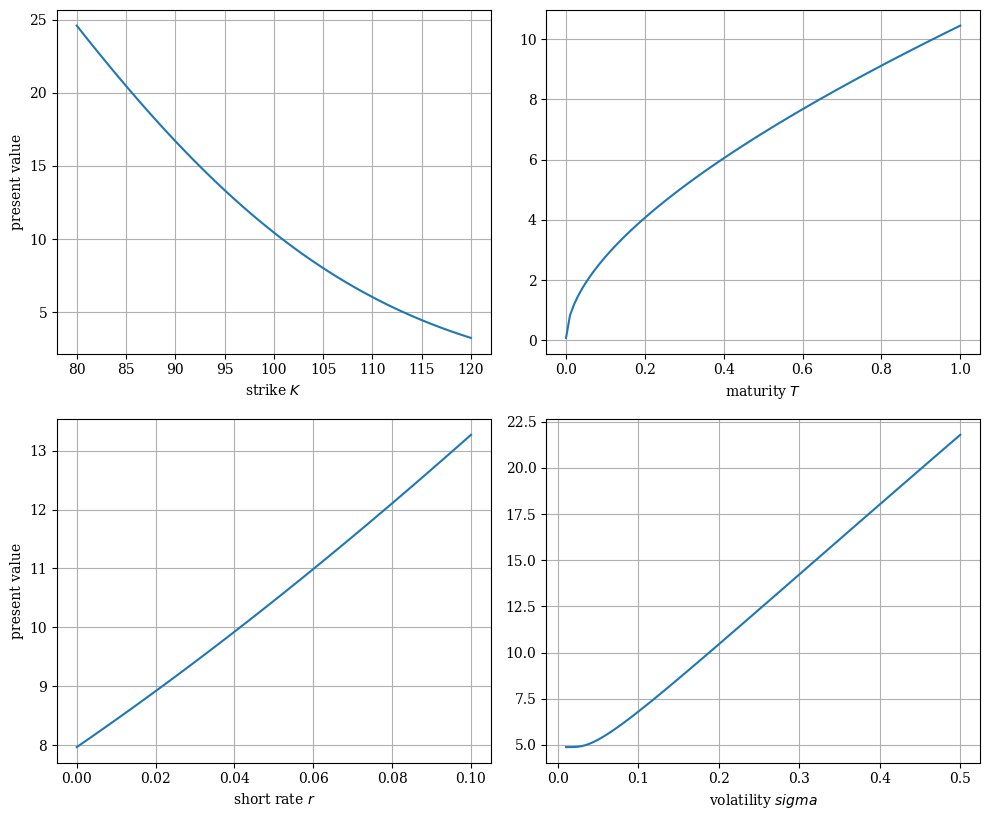

In [29]:
plot_values(BSM_call_value)


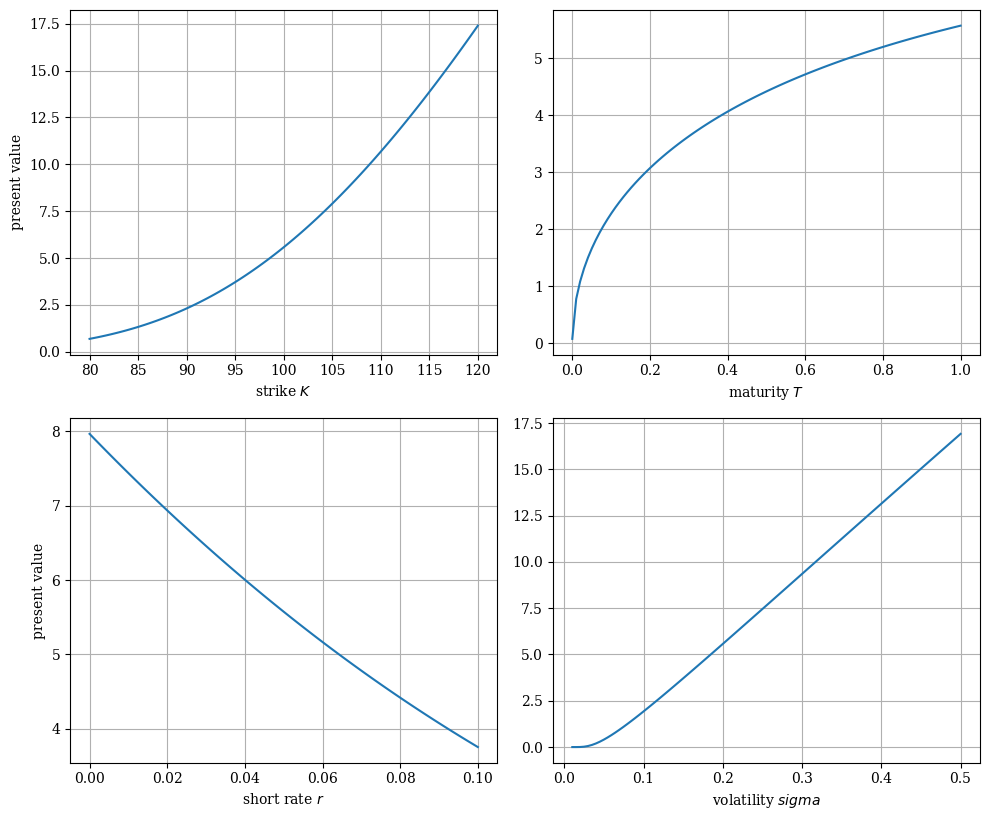

In [31]:
plot_values(BSM_put_value)